In [2]:
import os
import glob
import sys
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('2019-Nov.csv', parse_dates=['event_time']) # pandas
df.shape

(67501979, 9)

In [3]:
df.head(50)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01+00:00,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02+00:00,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02+00:00,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02+00:00,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


# 데이터 전처리

데이터 전처리는 pandas로 진행하기로 결정하였다. 로컬로 작업하여 10GB 이내의 csv 파일은 충분히 활용가능하다고 판단하였다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 4.5+ GB


In [5]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

사용자 추적에 있어서 필요한 정보인 user_session이 결측치인 row는 제거하고 int 타입이라 해석에 어려움이 있는 category_id 또한 제거한다.

In [45]:
def csv_read(csv_name):
    
    df = pd.read_csv(f'{csv_name}.csv', parse_dates=['event_time'], index_col=0)
    
    if 'category_id' in df.columns:
        
        df = df.drop('category_id', axis=1)
    
    if len(df[df.user_session.isnull() == True]) != 0:
        
        df = df.drop(df[df.user_session.isnull() == True].index)
        
    if df['user_session'].dtypes == 'object':
        
        le = LabelEncoder()
        df['user_session'] = le.fit_transform(df['user_session'])
    
    df['event_type'] = df['event_type'].astype('category')
    df['category_code'] = df['category_code'].astype('category')
    df['brand'] = df['brand'].astype('category')
    df['product_id'] = df['product_id'].astype('int32')
    df['user_id'] = df['user_id'].astype('int32')
    df['price'] = df['price'].astype('float32')
    df['user_session'] = df['user_session'].astype('int32')
    
    df = df.reset_index(drop=True)
    
    return df

In [47]:
df = csv_read('2019-Nov')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501969 entries, 0 to 67501968
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int32              
 3   category_code  category           
 4   brand          category           
 5   price          float32            
 6   user_id        int32              
 7   user_session   int32              
dtypes: category(3), datetime64[ns, UTC](1), float32(1), int32(3)
memory usage: 1.8 GB


데이터 경량화를 통해 메모리 사용량을 현저히 감소시켰다.

# seaborn 초기 설정

In [57]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("ticks")
sns.set_context("notebook")
blues = sns.color_palette("Blues", as_cmap=True)

# Pandas

# EDA

In [20]:
df['event_type'].value_counts(normalize=True)

view        0.941544
cart        0.044872
purchase    0.013584
Name: event_type, dtype: float64

view, cart, purchase로 사용자의 행동이 기록되고 있다.

In [22]:
len(df['category_code'].unique())

130

In [32]:
temp = df['category_code'].value_counts().head(10)
temp

electronics.smartphone              16375000
electronics.video.tv                 2208046
computers.notebook                   2180554
electronics.clocks                   2086966
apparel.shoes                        1886890
electronics.audio.headphone          1816877
appliances.environment.vacuum        1528058
appliances.kitchen.refrigerators     1427162
appliances.kitchen.washer            1403866
computers.desktop                     690502
Name: category_code, dtype: int64

카테고리는 130개로 구분되며 스마트폰, TV, 노트북등 가전제품들이 많은 관심을 받았다.

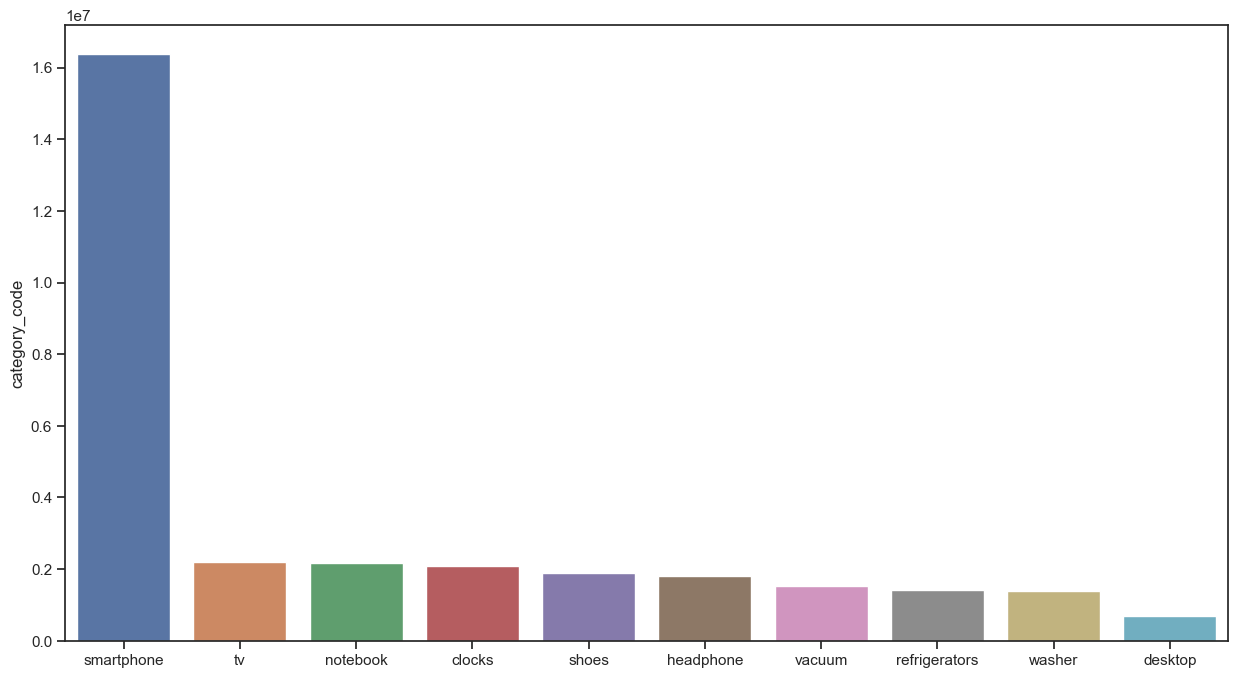

In [28]:
sns.barplot(x=[s.split('.')[-1] for s in temp.index], y=temp);

모든 event_type에 대한 누적값이 높은 상품들의 순위는 이러했다. 하지만 이 값은 view, cart를 포함한 수치라 실질적인 구매로 이어진지는 알수가 없다.

In [40]:
temp = df['category_code'][df.event_type == 'purchase'].value_counts().head(10)
temp

electronics.smartphone              382647
electronics.audio.headphone          40834
electronics.video.tv                 30274
electronics.clocks                   23237
appliances.kitchen.washer            19772
computers.notebook                   18433
appliances.environment.vacuum        18193
appliances.kitchen.refrigerators     13042
apparel.shoes                        10140
electronics.tablet                    6138
Name: category_code, dtype: int64

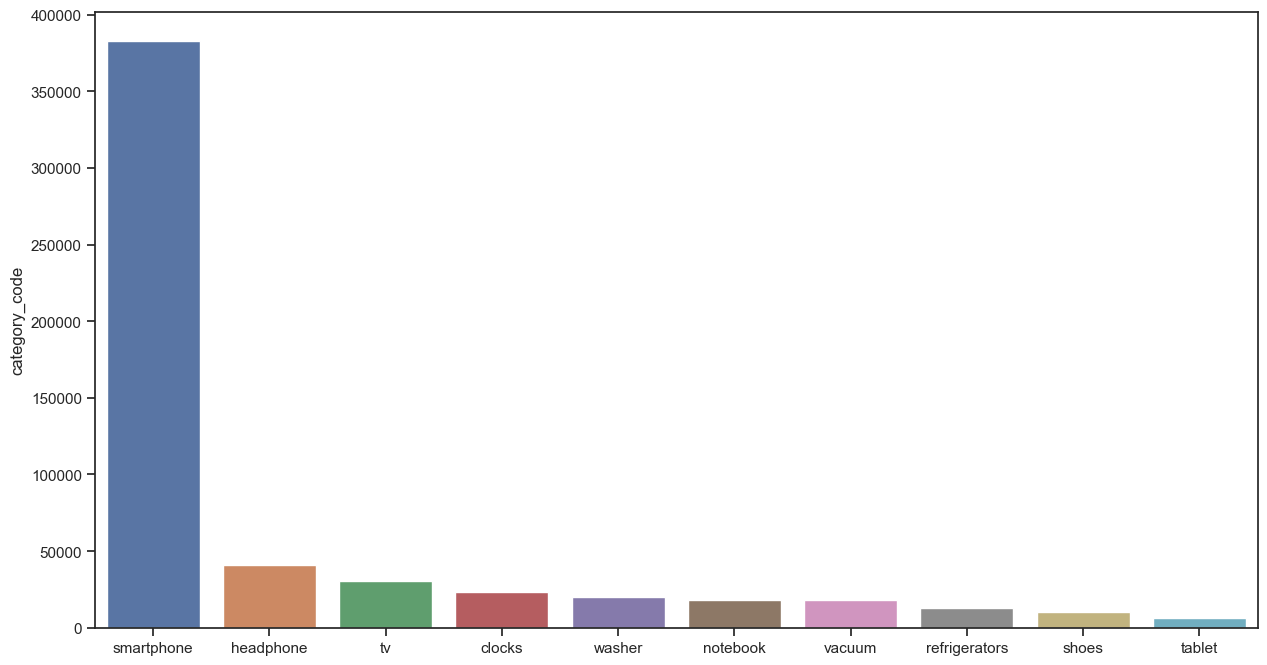

In [41]:
sns.barplot(x=[s.split('.')[-1] for s in temp.index], y=temp);

event_type이 purchase에 한정한 카테고리의 순위이다. 대체적으로 view에 비례하지만 smartphone을 제외한 나머지 카테고리의 실구매율이 더 낮아진 것으로 확인된다.

In [56]:
temp = df['category_code'][df.event_type == 'purchase'].value_counts() / df['category_code'][df.event_type != 'purchase'].value_counts()
temp = temp.sort_values(ascending=False).dropna()
temp

kids.fmcg.diapers               0.025788
electronics.smartphone          0.023927
electronics.audio.headphone     0.022992
appliances.kitchen.microwave    0.017089
appliances.personal.scales      0.016881
                                  ...   
apparel.underwear               0.001764
construction.tools.soldering    0.001705
apparel.shoes.slipons           0.001606
apparel.dress                   0.001161
apparel.skirt                   0.001133
Name: category_code, Length: 126, dtype: float64

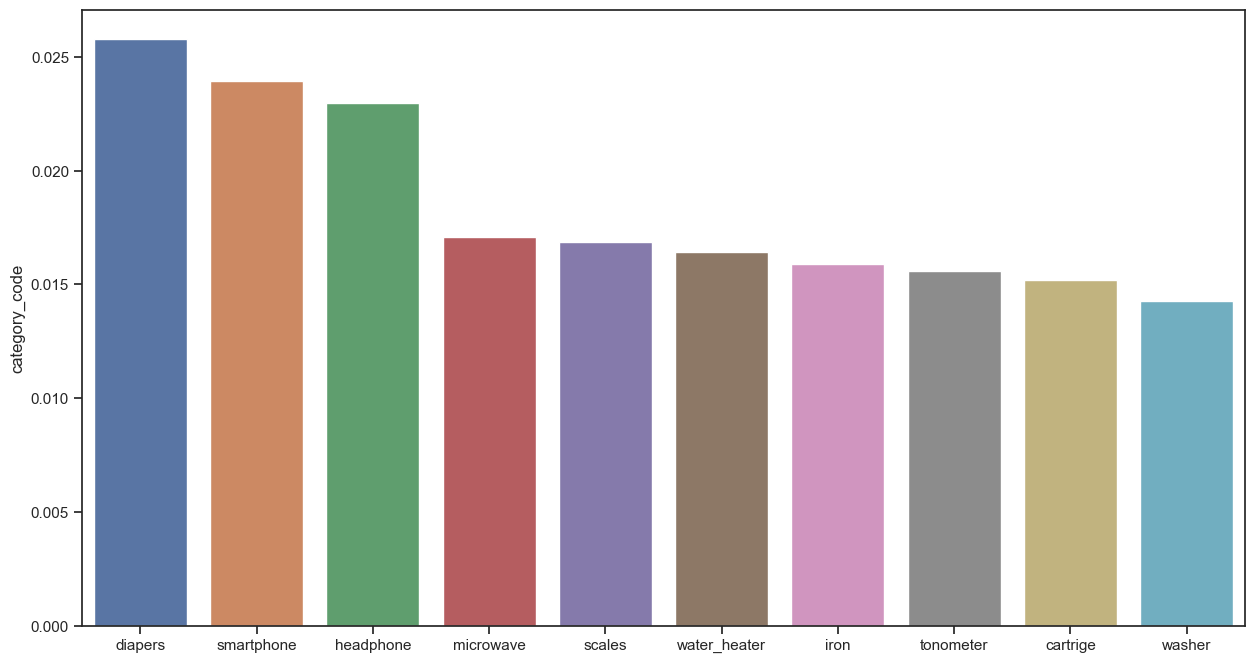

In [57]:
sns.barplot(x=[s.split('.')[-1] for s in temp.head(10).index], y=temp.head(10));

실구매율을 확인했을때 높은 순위이다. 기저귀의 경우 스마트폰을 넘어 1위를 차지하였는데 단순 검색이 아닌 구매를 위해 검색을 하는 비율이 다른 항목에 비해 높은 것이 그 이유라 추측하였다.

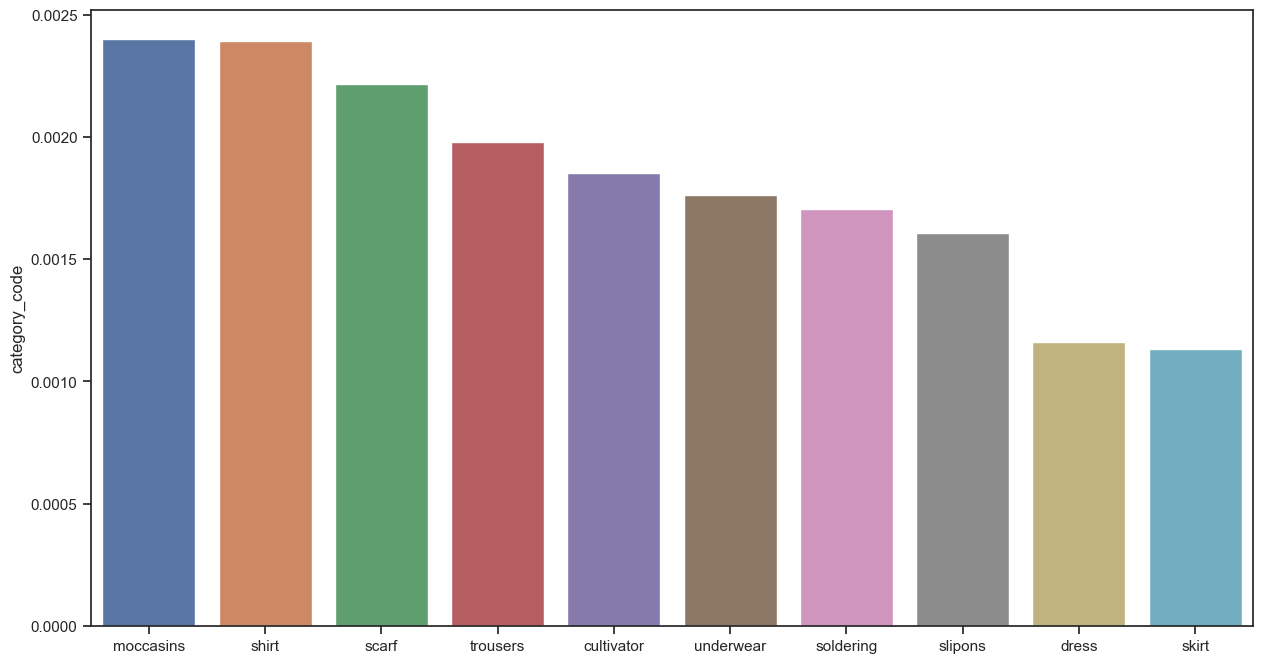

In [58]:
sns.barplot(x=[s.split('.')[-1] for s in temp.tail(10).index], y=temp.tail(10));

실구매율을 확인했을때 낮은 순위이다. 패션에 관련된 물품들이 실구매율이 낮게 나왔다. 

In [29]:
temp = df['brand'].value_counts().head(10)
temp

samsung    7889245
apple      6259379
xiaomi     4638062
huawei     1410126
lucente    1185075
lg         1096990
bosch       975059
oppo        811698
sony        798457
respect     765331
Name: brand, dtype: int64

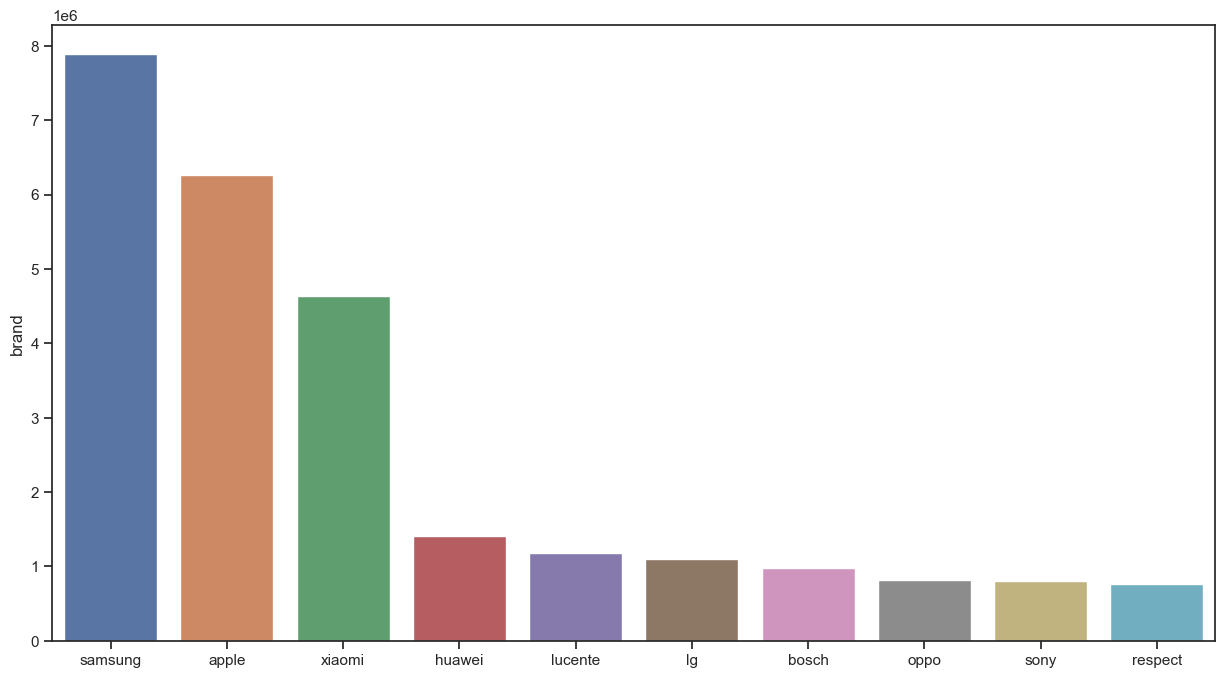

In [30]:
sns.barplot(x=temp.index, y=temp);

가장 인기있는 브랜드의 순위이다. 1,2,3위 모두 스마트폰이 주력인 브랜드이다.

In [9]:
df['user_id'].value_counts().mean()

18.26294432779049

평균적으로 한 고객은 한달동안 18번의 행동을 하였다.

In [25]:
df['price'][df.event_type == 'purchase'].mean()

300.1234438714026

고객들이 결제할때의 가격의 평균은 300달러이다.

In [41]:
len(set(df['user_id'][df.event_type == 'purchase'])) / len(df['user_id'].unique())

0.11948701840336765

12퍼정도의 고객만 결제를 한다.

In [65]:
df = df[df.category_code == 'electronics.smartphone'].drop('category_code', axis=1).reset_index(drop=True)

In [66]:
df.shape[0] / 67501979

0.24258548034569474

스마트폰이 모든 event의 24%를 기록하고 있었다.

# Spark

SQL 구문을 이용

In [3]:
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
conf_spark = SparkConf().set("spark.driver.host", "127.0.0.1")
sc = SparkContext(conf=conf_spark)
sc.version

'3.3.1'

In [4]:
spark = SparkSession.builder.master("local[1]").appName("CP1").getOrCreate()
spark

In [5]:
sparkDF = (spark.read.format("csv").options(header="true").load("df.csv"))
sparkDF = sparkDF.withColumnRenamed('_c0', 'index')

for i in ['index', 'product_id', 'user_id', 'user_session']:
    sparkDF = sparkDF.withColumn(i, sparkDF[i].cast('int'))

sparkDF = sparkDF.withColumn('price', sparkDF['price'].cast('float'))
sparkDF = sparkDF.withColumn('event_time', sparkDF['event_time'].cast('timestamp'))

In [239]:
sparkDF.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: float (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)



In [6]:
sparkDF.createOrReplaceGlobalTempView('df')

In [8]:
spark.sql('SELECT * from global_temp.df').show()

+-----+-------------------+----------+----------+--------------------+--------+------+---------+------------+
|index|         event_time|event_type|product_id|       category_code|   brand| price|  user_id|user_session|
+-----+-------------------+----------+----------+--------------------+--------+------+---------+------------+
|    0|2019-11-01 09:00:00|      view|   1003461|electronics.smart...|  xiaomi|489.07|520088904|     4156059|
|    1|2019-11-01 09:00:00|      view|   5000088|appliances.sewing...|  janome|293.65|530496790|     7664389|
|    2|2019-11-01 09:00:01|      view|  17302664|                null|   creed| 28.31|561587266|     6315299|
|    3|2019-11-01 09:00:01|      view|   3601530|appliances.kitche...|      lg|712.87|518085591|     3228754|
|    4|2019-11-01 09:00:01|      view|   1004775|electronics.smart...|  xiaomi|183.27|558856683|     2648540|
|    5|2019-11-01 09:00:01|      view|   1306894|  computers.notebook|      hp|360.09|520772685|     6967266|
|    6|201

# 카테고리 분석

In [ ]:
temp = spark.sql('''SELECT category_code,
                    round(sum(price), 1) as sum
                    from global_temp.df 
                    where event_type="purchase" 
                    group by category_code
                    order by sum DESC''').toPandas()

In [80]:
cate = {s.split('.')[0]:0 for s in temp['category_code'] if s != None}

for i in enumerate(temp['category_code']):
    if i[1] != None:
        cate[i[1].split('.')[0]] += round(temp['sum'][i[0]])

In [97]:
dict(zip(cate.keys(),map(lambda x:round(x[1]/sum(temp['sum']),4),cate.items())))

{'electronics': 0.7458,
 'computers': 0.0509,
 'appliances': 0.0677,
 'apparel': 0.0043,
 'furniture': 0.0092,
 'auto': 0.005,
 'kids': 0.0026,
 'construction': 0.0039,
 'sport': 0.0014,
 'accessories': 0.0004,
 'medicine': 0.0001,
 'country_yard': 0.0,
 'stationery': 0.0}

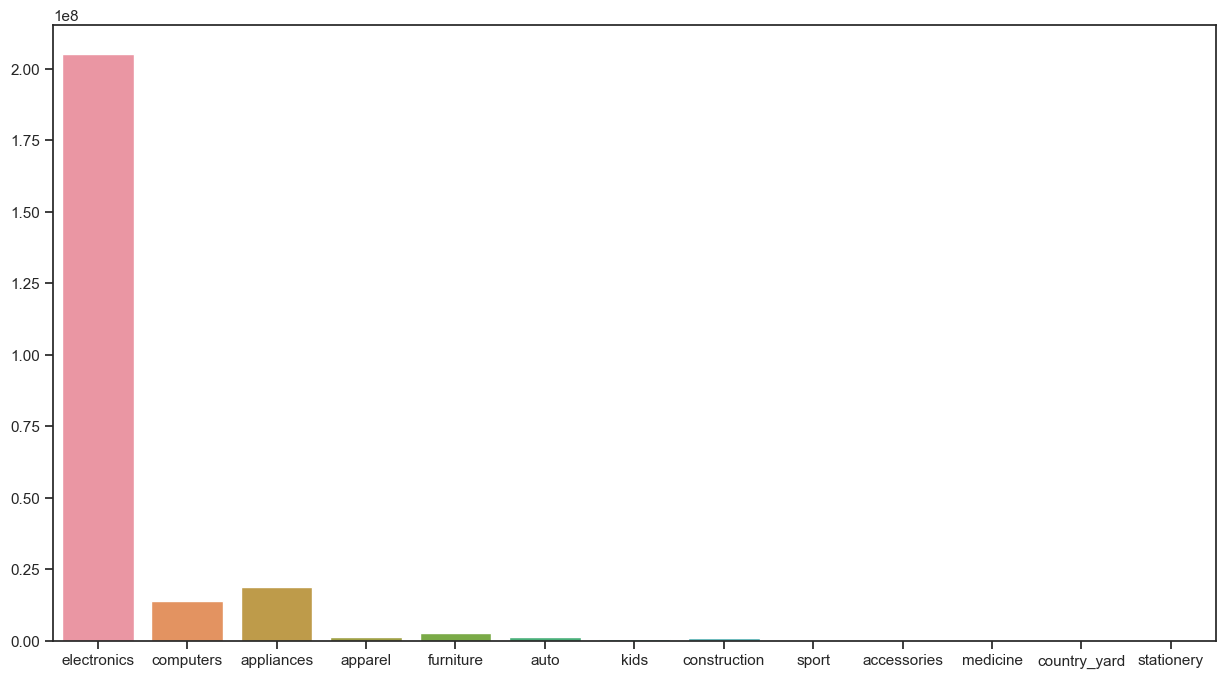

In [215]:
sns.barplot(x=list(cate.keys()), y=list(cate.values()));

# 일별 매출 통계

In [228]:
spark.sql('''SELECT DATE(event_time),
                    count(case when event_type = 'view' then 1 end) as view,
                    count(case when event_type = 'cart' then 1 end) as cart,
                    count(case when event_type = 'purchase' then 1 end) as purchase,
                    round(sum(price)/1000000, 2) as sales
                    from global_temp.df
                    group by DATE(event_time)''').show(30)

+----------+-------+------+--------+-------+
|event_time|   view|  cart|purchase|  sales|
+----------+-------+------+--------+-------+
|2019-11-01| 915416| 14386|   17209|  276.8|
|2019-11-02|1480258| 19502|   22005| 444.29|
|2019-11-03|1572159| 19778|   22205|  477.1|
|2019-11-04|1613638| 21582|   25668| 495.87|
|2019-11-05|1718527| 19693|   25414| 511.07|
|2019-11-06|1630395| 19337|   24995| 483.09|
|2019-11-07|1753872| 20083|   25249| 514.09|
|2019-11-08|1756274| 62552|   25258| 537.62|
|2019-11-09|1781871| 71670|   23542| 546.19|
|2019-11-10|1834753| 71287|   22772| 567.04|
|2019-11-11|1876263| 74320|   24551| 570.51|
|2019-11-12|1900853| 70206|   23057| 583.89|
|2019-11-13|1902879| 70831|   22390| 591.99|
|2019-11-14|2196246| 77994|   23263| 699.75|
|2019-11-15|5216748|478144|    4523|1811.31|
|2019-11-16|6119565|420227|   64266|2026.45|
|2019-11-17|6130474|423878|  143157|1996.52|
|2019-11-18|2752098|170262|   67942| 849.47|
|2019-11-19|1692797| 74025|   25469| 509.35|
|2019-11-2

In [49]:
temp = spark.sql('''SELECT DATE(event_time),
                    count(case when event_type = 'view' then 1 end) as view,
                    count(case when event_type = 'cart' then 1 end) as cart,
                    count(case when event_type = 'purchase' then 1 end) as purchase,
                    round(sum(price)/1000000, 2) as sales
                    from global_temp.df
                    group by DATE(event_time)''').toPandas()

<AxesSubplot:xlabel='event_time', ylabel='sales'>

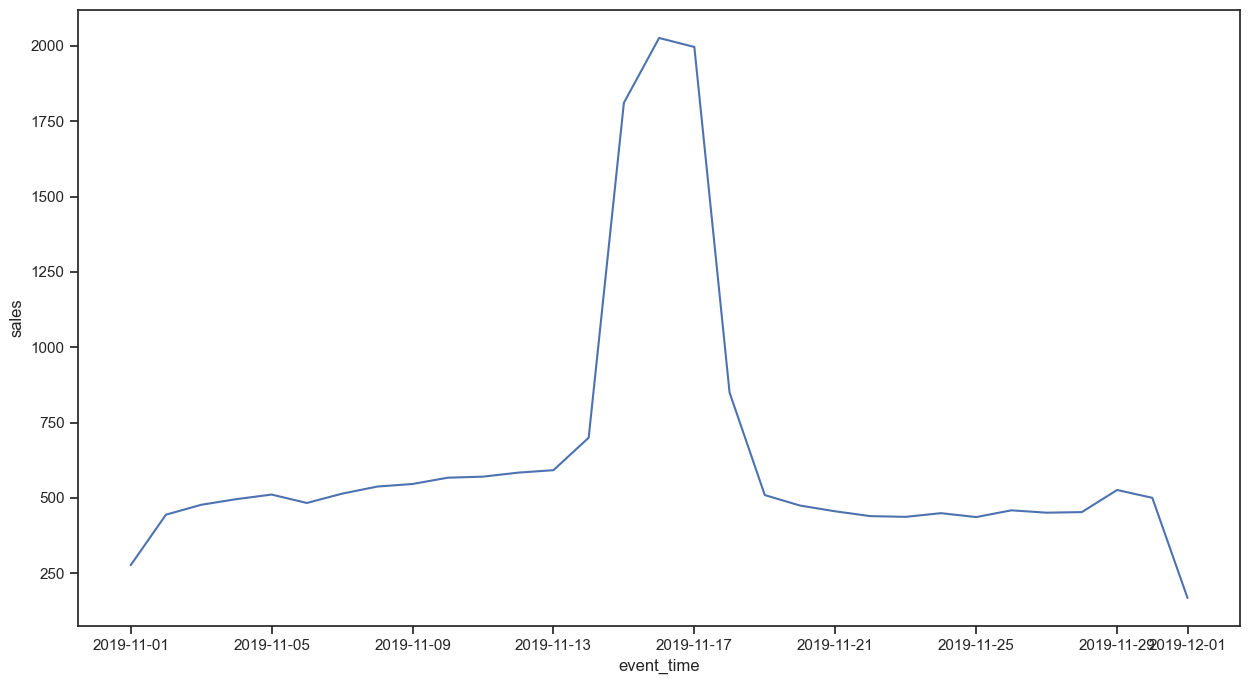

In [59]:
sns.lineplot(data=temp, x='event_time', y='sales', markers=True)

# 액티브 유저 분석

In [238]:
spark.sql('''select DATE(event_time),
             count(distinct user_id) as active
             from global_temp.df 
             where event_type = 'purchase' 
             group by DATE(event_time)
             order by DATE(event_time)''').show()

+----------+------+
|event_time|active|
+----------+------+
|2019-11-01| 12789|
|2019-11-02| 16187|
|2019-11-03| 16475|
|2019-11-04| 18877|
|2019-11-05| 18564|
|2019-11-06| 18136|
|2019-11-07| 18417|
|2019-11-08| 18387|
|2019-11-09| 17246|
|2019-11-10| 16754|
|2019-11-11| 17954|
|2019-11-12| 16600|
|2019-11-13| 16126|
|2019-11-14| 16492|
|2019-11-15|  3460|
|2019-11-16| 44129|
|2019-11-17| 92930|
|2019-11-18| 44408|
|2019-11-19| 17874|
|2019-11-20| 17635|
+----------+------+
only showing top 20 rows



In [220]:
active = spark.sql('''select count(distinct user_id) as active
             from global_temp.df 
             where event_type = 'purchase' and date(event_time) > '2019-11-02'
             group by date(event_time) ,hour(event_time)
             order by date(event_time) ,hour(event_time)''')

In [221]:
active = list(temp.toPandas()['active'])

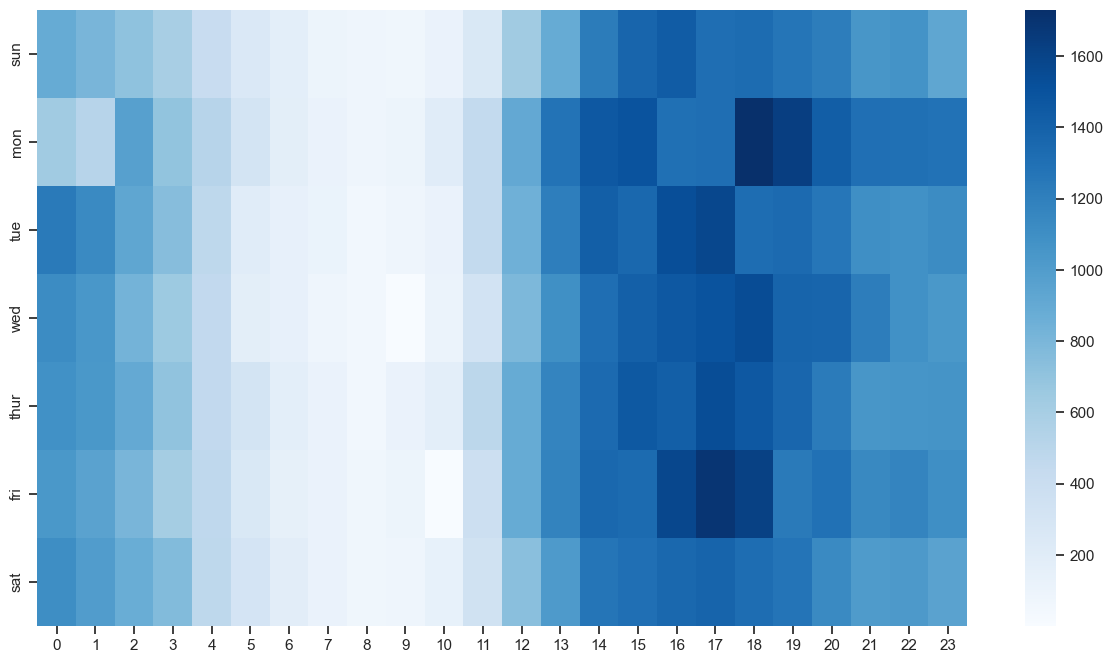

In [222]:
days = ['sun', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat']
sns.heatmap(np.array(active[:24*7]).reshape(7,24), cmap=blues, yticklabels=days);

# 제품 분석

In [62]:
product = spark.sql('''SELECT product_id, 
             max(brand) as brand, 
             COUNT(case when event_type = 'view' then 1 end) as view,
             COUNT(case when event_type = 'cart' then 1 end) as cart,
             COUNT(case when event_type = 'purchase' then 1 end) as purchase,
             round(avg(price),2) as avg,
             max(price) as max,
             min(price) as min,
             round(COUNT(case when event_type = 'purchase' then 1 end) / COUNT(case when event_type = 'view' then 1 end),3) as vtop,
             round(COUNT(case when event_type = 'purchase' then 1 end) / COUNT(case when event_type = 'cart' then 1 end),3) as ctop,
             min(event_time) as first
             from global_temp.df
             group by product_id 
             order by count(*) DESC;''')

product.show()

+----------+-------+------+-----+--------+-------+-------+-------+-----+-----+-------------------+
|product_id|  brand|  view| cart|purchase|    avg|    max|    min| vtop| ctop|              first|
+----------+-------+------+-----+--------+-------+-------+-------+-----+-----+-------------------+
|   1005115|  apple|583010|65395|   22244| 923.54| 990.99|  912.5|0.038| 0.34|2019-11-01 09:00:10|
|   1004856|samsung|522880|81205|   32321| 127.27| 136.17| 124.11|0.062|0.398|2019-11-01 09:00:23|
|   1004767|samsung|482898|64567|   22613|  245.7| 277.97|  235.6|0.047| 0.35|2019-11-01 09:00:30|
|   4804056|  apple|318339|54639|   17800| 162.87| 169.63| 159.33|0.056|0.326|2019-11-01 09:01:30|
|   1005160| xiaomi|304614|25271|    6877| 202.36| 212.08| 190.61|0.023|0.272|2019-11-01 09:09:36|
|   1004870|samsung|272097|34585|   10673| 282.24| 329.46| 266.52|0.039|0.309|2019-11-01 09:01:33|
|   1005105|  apple|275721|22284|    8483|1351.46|1436.07|1286.65|0.031|0.381|2019-11-01 09:03:27|
|   100483

In [63]:
temp = product.toPandas()

In [8]:
product.createOrReplaceGlobalTempView('product')

# RFM

In [14]:
user = spark.sql('''SELECT user_id,
             max(event_time) as last_purchase,
             count(*) as purchase_count,
             round(sum(price), 2) as sum,
             round(2 * cume_dist() over(order by sum(price) asc), 3) as monetary,
             round(cume_dist() over(order by count(*) asc), 3) as frequency,
             DATEDIFF(day, max(event_time), '2019-12-02') as recency
             from global_temp.df
             where event_type = 'purchase'
             group by user_id
             order by purchase_count DESC;''')

user.show()

+---------+-------------------+--------------+---------+--------+---------+-------+
|  user_id|      last_purchase|purchase_count|      sum|monetary|frequency|recency|
+---------+-------------------+--------------+---------+--------+---------+-------+
|564068124|2019-12-01 03:14:58|           519| 131929.2|     2.0|      1.0|      0|
|512386086|2019-11-30 20:05:17|           268|161682.49|     2.0|      1.0|      1|
|549109608|2019-11-30 20:25:24|           222|106692.02|     2.0|      1.0|      1|
|518514099|2019-11-28 21:05:15|           202|203986.07|     2.0|      1.0|      3|
|549030056|2019-12-01 05:56:21|           190| 30271.04|   1.999|      1.0|      0|
|566448225|2019-11-30 19:28:51|           175| 44528.34|     2.0|      1.0|      1|
|538473314|2019-11-30 21:24:09|           163| 45383.96|     2.0|      1.0|      1|
|513230794|2019-11-30 20:10:29|           156| 73181.68|     2.0|      1.0|      1|
|543128872|2019-11-30 21:28:31|           156| 24576.13|   1.999|      1.0| 

In [10]:
user.createOrReplaceGlobalTempView('user')

In [ ]:
save = spark.sql('''SELECT df.user_id,
             round(cume_dist() over(order by avg(df.price - pro.avg) asc), 3) as save
             from global_temp.df as df 
             inner join global_temp.product as pro
             on df.product_id = pro.product_id
             where event_type = 'purchase'
             group by user_id''')

In [22]:
save.createOrReplaceGlobalTempView('save')

In [29]:
user = spark.sql('''SELECT user.user_id, user.last_purchase, user.purchase_count, user.sum, user.monetary, user.frequency, save.save, user.recency
             from global_temp.user
             inner join global_temp.save
             on user.user_id = save.user_id
             order by user.sum DESC;''')

user.show()

+---------+-------------------+--------------+---------+--------+---------+-----+-------+
|  user_id|      last_purchase|purchase_count|      sum|monetary|frequency| save|recency|
+---------+-------------------+--------------+---------+--------+---------+-----+-------+
|518514099|2019-11-28 21:05:15|           202|203986.07|     2.0|      1.0|0.954|      3|
|512386086|2019-11-30 20:05:17|           268|161682.49|     2.0|      1.0|0.395|      1|
|564068124|2019-12-01 03:14:58|           519| 131929.2|     2.0|      1.0| 0.29|      0|
|515715331|2019-11-28 15:30:18|            80|117130.12|     2.0|      1.0|  0.7|      3|
|521230795|2019-12-01 04:54:11|           120|111072.35|     2.0|      1.0|0.864|      0|
|549109608|2019-11-30 20:25:24|           222|106692.02|     2.0|      1.0|0.653|      1|
|569333570|2019-11-30 16:48:01|            70| 99622.06|     2.0|      1.0|0.038|      1|
|512842822|2019-12-01 06:26:27|            77| 97475.35|     2.0|      1.0|0.032|      0|
|515384420

In [30]:
user.createOrReplaceGlobalTempView('user')

In [31]:
temp = spark.sql('''SELECT purchase_count from global_temp.user''').toPandas()
{100-s:np.percentile(np.array(temp['purchase_count']), s) for s in range(10,100,10)}

{90: 1.0,
 80: 1.0,
 70: 1.0,
 60: 1.0,
 50: 1.0,
 40: 1.0,
 30: 2.0,
 20: 2.0,
 10: 4.0}

하위 70퍼가 1개 상위 30퍼가 2개 상위 10퍼가 4개를 산다.

# 6 months test

In [ ]:
extension = 'csv' #csv로 파일 확장자 지정 
all_filenames = [i for i in glob.glob('dataset/*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ]) #지정한 파일 경로에 있는 모든 파일 불러오기
#export to csv
combined_csv.to_csv("combined_csv.csv", index=False) 

In [11]:
sparkDF = (spark.read.format("csv").options(header="true").load("combined.csv"))
sparkDF = sparkDF.withColumn('price', sparkDF['price'].cast('float'))
sparkDF = sparkDF.withColumn('event_time', sparkDF['event_time'].cast('timestamp'))

In [12]:
sparkDF.createOrReplaceGlobalTempView('all')

In [13]:
spark.sql('''SELECT * from global_temp.all''').show(10)

+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|2019-11-01 09:00:00|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|
|2019-11-01 09:00:00|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|
|2019-11-01 09:00:01|      view|  17302664|2053013553853497655|                null|   creed| 28.31|561587266|755422e7-9040-477...|
|2019-11-01 09:00:01|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3bfb58cd-7892-48c...|
|2019-11-01 09:00:01|      view|   1004775|2053013555631882655|electronics.s

In [33]:
user6 = spark.sql('''SELECT user_id,
             min(event_time) as first_purchase,
             max(event_time) as last_purchase,
             count(*) as purchase_count,
             round(sum(price), 2) as sum,
             round(2 * cume_dist() over(order by sum(price) asc), 3) as monetary,
             round(cume_dist() over(order by count(*) asc), 3) as frequency,
             DATEDIFF(day, max(event_time), '2020-05-02') as recency
             from global_temp.all
             where event_type = 'purchase'
             group by user_id
             order by purchase_count DESC;''')

user6.show()

+---------+-------------------+-------------------+--------------+---------+--------+---------+-------+
|  user_id|     first_purchase|      last_purchase|purchase_count|      sum|monetary|frequency|recency|
+---------+-------------------+-------------------+--------------+---------+--------+---------+-------+
|568782581|2019-11-08 12:57:28|2020-03-09 19:42:57|          2120|540447.61|     2.0|      1.0|     53|
|513230794|2019-11-01 15:13:15|2020-03-22 17:58:35|          1331|630127.67|     2.0|      1.0|     40|
|549109608|2019-11-01 15:27:29|2020-04-06 18:37:22|          1229|672447.47|     2.0|      1.0|     25|
|598224683|2020-01-08 16:00:47|2020-04-30 17:10:22|          1059|539601.68|     2.0|      1.0|      1|
|513320236|2019-11-01 15:49:15|2020-04-28 16:47:56|           917|472580.05|     2.0|      1.0|      3|
|563599039|2019-11-01 18:23:13|2020-02-13 15:46:06|           915|465289.42|     2.0|      1.0|     78|
|572994775|2019-11-18 20:49:27|2020-04-08 14:47:11|           86

In [34]:
user6.createOrReplaceGlobalTempView('user6')

In [42]:
spark.sql('''select month(first_purchase),
             count(user_id)
             from global_temp.user6
             group by month(first_purchase)
             order by month(first_purchase)''').show()

+---------------------+--------------+
|month(first_purchase)|count(user_id)|
+---------------------+--------------+
|                    1|        227735|
|                    2|        235676|
|                    3|        267607|
|                    4|        325129|
|                    5|          3009|
|                   11|        439109|
|                   12|        385253|
+---------------------+--------------+



In [43]:
temp = list(spark.sql('''select recency from global_temp.user6''').toPandas()['recency'])

In [44]:
from collections import Counter
result = Counter([s//30 for s in temp])
result

Counter({1: 351492,
         0: 476159,
         2: 276427,
         4: 287655,
         3: 223750,
         5: 252214,
         6: 15821})